# COVID-19 Analysis

This project focuses on data visualization to derive assumptions on coronavirus data. Inspired by current events.

In [344]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning

In [345]:
data = pd.read_csv("resources/covid_states.csv")

In [346]:
data.head()

# I looked through the csv file manually and selected the columns that I felt were more critical to the analysis
# Obviously the gravity of the column's importance can be different for someone else
# So I encourage others to download the resource first

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201206,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,20201206,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2,20201206,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,...,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
3,20201206,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
4,20201206,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,...,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN


In [347]:
# Taking specific columns from the entire dataset

covid = data[['date', 'state', 'positive', 'negative', 'positiveIncrease', 'totalTestResults',
             'hospitalizedCurrently', 'hospitalizedCumulative', 'hospitalizedIncrease',
             'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered', 
             'deathConfirmed', 'deathIncrease', 'dataQualityGrade']]
covid.head()

,date,state,positive,negative,positiveIncrease,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,hospitalizedIncrease,onVentilatorCurrently,onVentilatorCumulative,recovered,deathConfirmed,deathIncrease,dataQualityGrade
0,20201206,AK,35720.0,1042056.0,757,1077776.0,164.0,799.0,0,21.0,NaN,7165.0,143.0,0,A
1,20201206,AL,269877.0,1421126.0,2288,1645041.0,1927.0,26331.0,0,NaN,1317.0,168387.0,3462.0,12,A
2,20201206,AR,170924.0,1614979.0,1542,1763150.0,1076.0,9401.0,21,179.0,1038.0,149490.0,2437.0,40,A+
3,20201206,AS,0.0,2140.0,0,2140.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,D
4,20201206,AZ,364276.0,2018813.0,5376,2370499.0,2977.0,28248.0,242,462.0,NaN,56382.0,6431.0,25,A+


In [348]:
# Convert the date field to a string for reformatting
covid = covid.astype({"date": str})

# Create a set <> list of all values in the date column
date_set = list(set(covid['date']))

# Loop through the list to replace that value in the dataframe
for i in date_set:
    reformat = i[4:6] + "/" + i[6:] + "/" + i[0:4]
    covid["date"].replace(i, reformat, inplace=True)

In [349]:
# Convert the date column into a datetime type
covid['date'] = pd.to_datetime(covid['date'])
covid.head()

,date,state,positive,negative,positiveIncrease,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,hospitalizedIncrease,onVentilatorCurrently,onVentilatorCumulative,recovered,deathConfirmed,deathIncrease,dataQualityGrade
0,2020-12-06,AK,35720.0,1042056.0,757,1077776.0,164.0,799.0,0,21.0,NaN,7165.0,143.0,0,A
1,2020-12-06,AL,269877.0,1421126.0,2288,1645041.0,1927.0,26331.0,0,NaN,1317.0,168387.0,3462.0,12,A
2,2020-12-06,AR,170924.0,1614979.0,1542,1763150.0,1076.0,9401.0,21,179.0,1038.0,149490.0,2437.0,40,A+
3,2020-12-06,AS,0.0,2140.0,0,2140.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,D
4,2020-12-06,AZ,364276.0,2018813.0,5376,2370499.0,2977.0,28248.0,242,462.0,NaN,56382.0,6431.0,25,A+


### Let's test the dataset by drawing a graph showing the basic timeline of COVID Tests throughout 2020

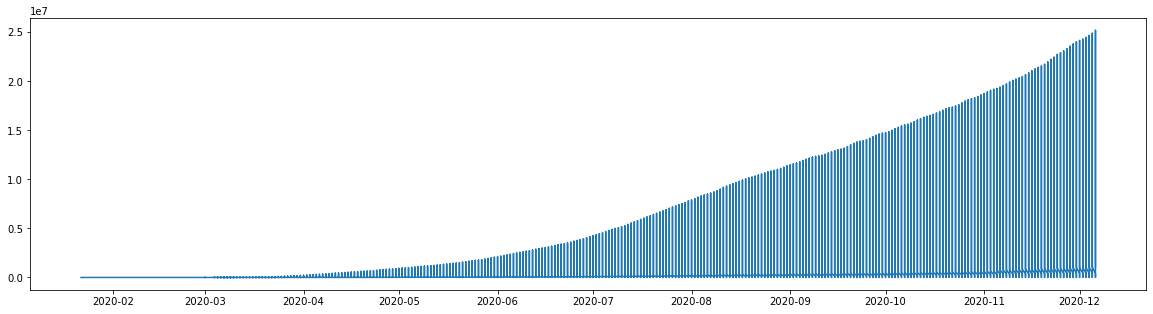

In [350]:
plt.figure(figsize=(20,5))
plt.plot(covid['date'], covid['totalTestResults'])

### Number of deaths overtime

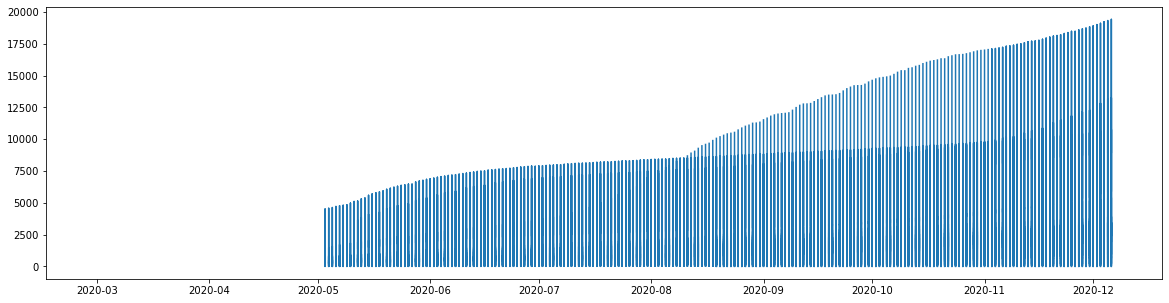

In [351]:
plt.figure(figsize=(20,5))
plt.plot(covid["date"], covid["deathConfirmed"])

It seems that the dataset did not start recording the death toll until May 2020. Also notice the spike in deaths around August 2020. Note:

* This does not necessarily mean that COVID spiked in August. Rather it means the disease seemed to be more potent or apparent. 
* The deaths had a gradual increase after August 2020. Could this be a cause of COVID-19 becoming more difficult to stop or a general ignorance of civillian care to the pandemic?

### California-focused analysis

In [352]:
# First make a new dataframe for CA only
cal_covid = covid.loc[covid['state'] == 'CA']
cal_covid.head()

# Unfortunately, the nature of the data does not provide some values (i.e. death, hospitalized, etc)

,date,state,positive,negative,positiveIncrease,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,hospitalizedIncrease,onVentilatorCurrently,onVentilatorCumulative,recovered,deathConfirmed,deathIncrease,dataQualityGrade
5,2020-12-06,CA,1341700.0,23853346.0,30075,25195046.0,10624.0,NaN,0,NaN,NaN,NaN,NaN,85,B
61,2020-12-05,CA,1311625.0,23590350.0,25068,24901975.0,10273.0,NaN,0,NaN,NaN,NaN,NaN,209,B
117,2020-12-04,CA,1286557.0,23388921.0,22018,24675478.0,9948.0,NaN,0,NaN,NaN,NaN,NaN,145,B
173,2020-12-03,CA,1264539.0,23210103.0,18591,24474642.0,9702.0,NaN,0,NaN,NaN,NaN,NaN,113,B
229,2020-12-02,CA,1245948.0,23053178.0,20759,24299126.0,9365.0,NaN,0,NaN,NaN,NaN,NaN,113,B


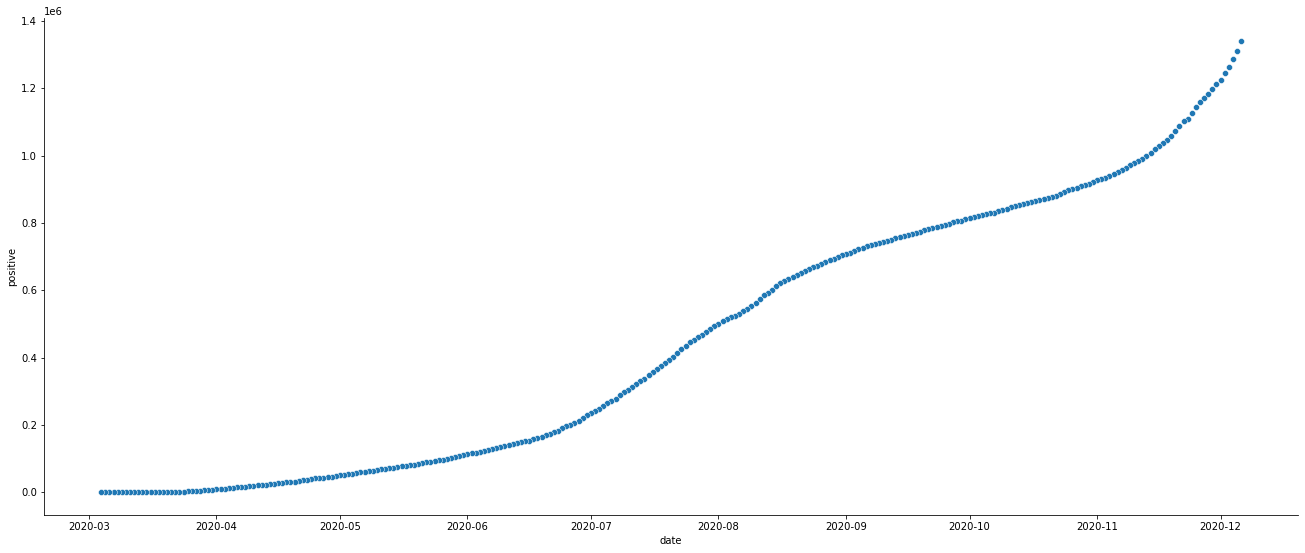

In [353]:
cal_positives = sns.relplot(x="date", y="positive", data=cal_covid)
cal_positives.fig.set_size_inches(20,8)

The positive test cases in CA is similar to the test cases across US. 

### How well was California at preventing COVID-related deaths?

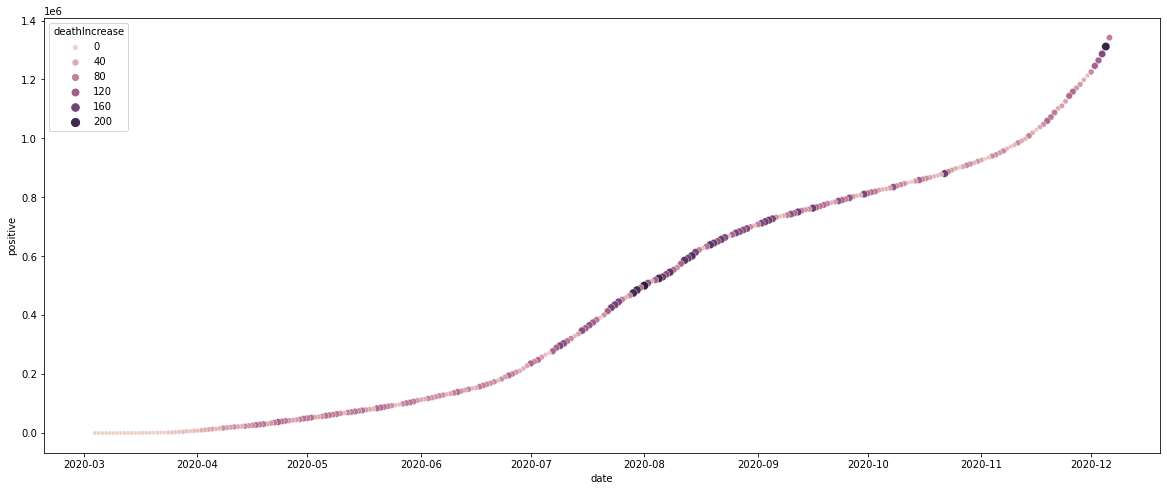

In [354]:
# Comparing positive test cases and the change in death toll over time

fig_size = (20, 8)
fig, ax = plt.subplots(figsize=fig_size)
cal_death_to_positive = sns.scatterplot(data=cal_covid, x="date", y="positive", hue="deathIncrease",
                                       size="deathIncrease", ax=ax)

Obviously, the total number of positive cases increased in CA exponentially. However, notice that the death toll comes in waves. Number of deaths were steady (using this term loosely) up until August '20.  

* daily deaths in CA increased greatly day after day for the entire month of August. Tapered off for the next couple of months with a huge "blob" of deaths occuring toward the end of the year. A few assumptions:
    * People wanted to enjoy their last month of summer before returning to schools. Causing positive cases to skyrocket mid-year. A rise in positive test cases resulted in rise in deaths.
    * Holidays season made if more difficult for hospitals, etc. to take care of existing patients?

### Information regarding August death toll increase

An [interesting article written by the Washington Post](https://www.washingtonpost.com/nation/2020/08/30/coronavirus-covid-updates/) gives details pertinent to the assumptions made above. 
* "We should have seen infection levels come down in July and August. They didn’t." - Scott Gottlieb
* Children started returning to schools, thereby spreading the virus further
* The virus spread to more rural parts of the state, where medicines and more advanced tech was unavailable.

### Is there a correlation between the five most populated states vs the five least populated states?

According to tthe [World Population Review](https://worldpopulationreview.com/states), themost populated cities are:
* California
* Texas
* Florida
* New York
* Pennsylvania

and the least populated are:
* Wyoming
* Vermont
* District of Columbia
* Alaska
* North Dakota 

In [355]:
# Creating separate dataframes for both sets
most_pop = covid[covid.state.isin(["CA", "TX", "FL", "NY", "PA"])]
least_pop = covid[covid.state.isin(["WY, VT", "DC", "AK", "ND"])]

most_pop.head()

,date,state,positive,negative,positiveIncrease,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,hospitalizedIncrease,onVentilatorCurrently,onVentilatorCumulative,recovered,deathConfirmed,deathIncrease,dataQualityGrade
5,2020-12-06,CA,1341700.0,23853346.0,30075,25195046.0,10624.0,NaN,0,NaN,NaN,NaN,NaN,85,B
10,2020-12-06,FL,1040727.0,6505237.0,8175,13083521.0,4400.0,57185.0,145,NaN,NaN,NaN,19423.0,96,A
37,2020-12-06,NY,705827.0,19888867.0,9702,20594694.0,4442.0,89995.0,0,464.0,NaN,87949.0,NaN,60,B
41,2020-12-06,PA,420114.0,2929036.0,8630,3349150.0,5300.0,NaN,0,587.0,NaN,238660.0,NaN,69,A+
47,2020-12-06,TX,1249323.0,10111653.0,8573,11360976.0,8681.0,NaN,0,NaN,NaN,1030716.0,NaN,92,A


In [356]:
least_pop.head()

,date,state,positive,negative,positiveIncrease,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,hospitalizedIncrease,onVentilatorCurrently,onVentilatorCumulative,recovered,deathConfirmed,deathIncrease,dataQualityGrade
0,2020-12-06,AK,35720.0,1042056.0,757,1077776.0,164.0,799.0,0,21.0,NaN,7165.0,143.0,0,A
8,2020-12-06,DC,23136.0,711497.0,264,734633.0,171.0,NaN,0,23.0,NaN,16665.0,NaN,2,A+
31,2020-12-06,ND,82981.0,274492.0,477,1132025.0,305.0,2880.0,12,NaN,NaN,76999.0,1013.0,6,B
56,2020-12-05,AK,34963.0,1032268.0,922,1067231.0,166.0,799.0,5,24.0,NaN,7165.0,143.0,1,A
64,2020-12-05,DC,22872.0,704515.0,392,727387.0,193.0,NaN,0,22.0,NaN,16596.0,NaN,2,A+


Because the populations vary so greatly, to adhere to scalability, I will create separate graphs to show.

<AxesSubplot:xlabel='date', ylabel='positive'>

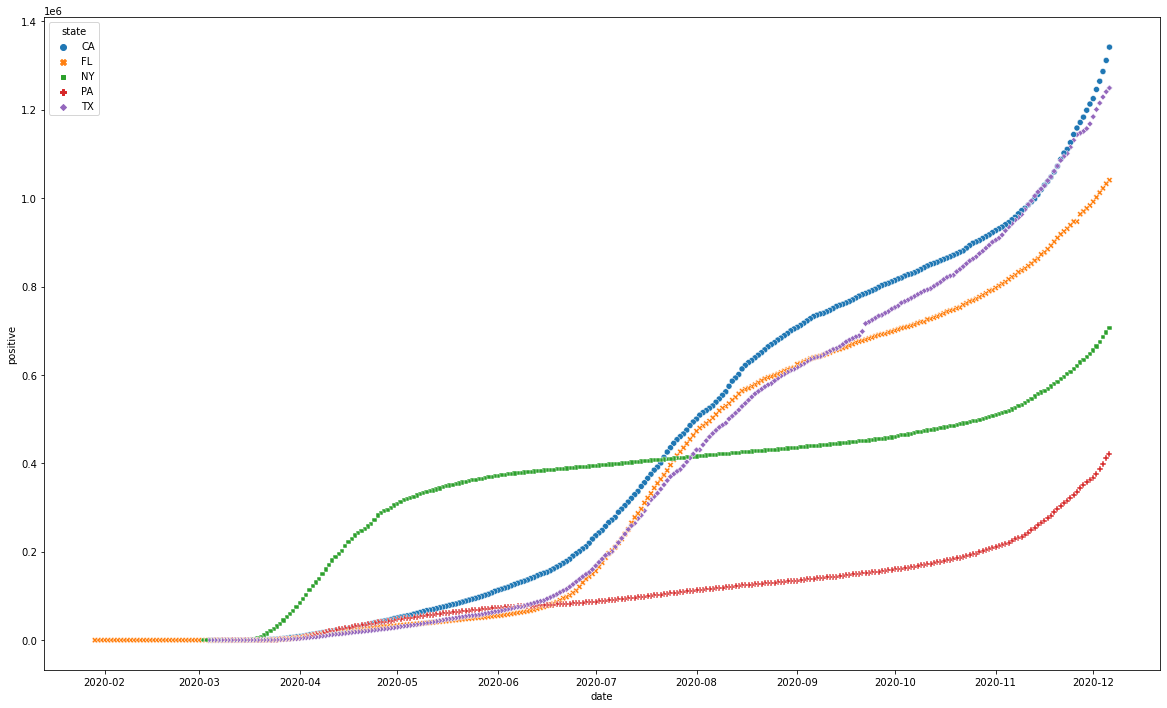

In [357]:
# Scatterplot the Most Populated States

fig_size = (20, 12)
fig, ax = plt.subplots(figsize=fig_size)
sns.scatterplot(data=most_pop, x="date", y="positive", hue="state", style="state")

Biggest Takeaway: the top three states (CA, TX, FL) followed a similar pattern throughout 2020.  
Lingering Questions:
* What happened to NY in April that might have cause a far larger spike than the others?
* How was PA able to maintain a steady covid response?

<AxesSubplot:xlabel='date', ylabel='positive'>

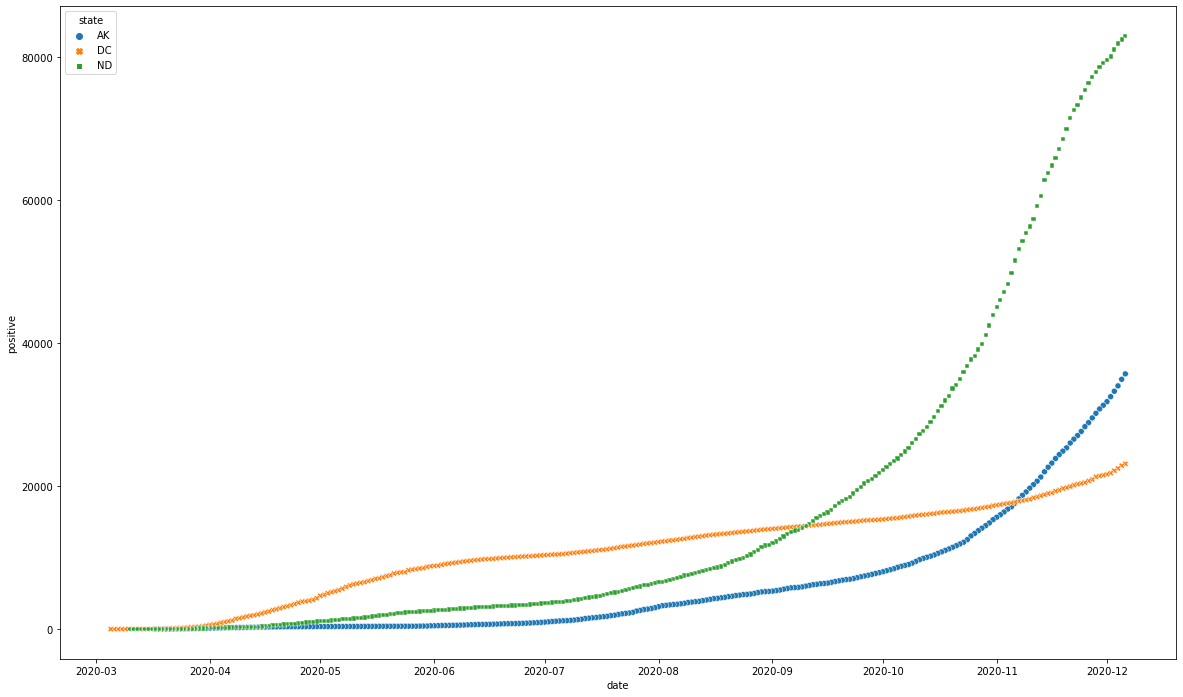

In [358]:
# Scatterplot the least populated states
fig_size = (20, 12)
fig, ax = plt.subplots(figsize=fig_size)
sns.scatterplot(data=least_pop, x="date", y="positive", hue="state", style="state")

NOTE: The dataset provides data only for AK, DC, and ND.  

Key takeaways:
* North Dakota seemed to skyrocket toward the end of the year. Similar to most trends we've seen so far.
* DC and AK follow more of a flat line, a constant positive increase that doesnt follow the same intense rise in positive cases like the top three most populated states. 
* We cannot say that least populated states are least likely to spike in positive cases because some states (i.e. ND) follow similar patterns to CA, TX, and FL.

Lingering Questions:
* Based on the Most and Least populated scatterplots, could there by an inverse correlation between inland states vs outer states?
* Lets take a look at regions to find why ND followed similar patterns to most populated states.

### Follow Up: Is there a correlation between inland states vs outer states (touching oceans)?

In [359]:
# Build two sets of states called inner and outer

outer = covid[covid.state.isin(["NC", "GA", "FL", "CA", "AZ", "OR"])]
inner = covid[covid.state.isin(["WY, UT", "CO", "KS", "NE", "IA"])]

outer.head()

,date,state,positive,negative,positiveIncrease,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,hospitalizedIncrease,onVentilatorCurrently,onVentilatorCumulative,recovered,deathConfirmed,deathIncrease,dataQualityGrade
4,2020-12-06,AZ,364276.0,2018813.0,5376,2370499.0,2977.0,28248.0,242,462.0,NaN,56382.0,6431.0,25,A+
5,2020-12-06,CA,1341700.0,23853346.0,30075,25195046.0,10624.0,NaN,0,NaN,NaN,NaN,NaN,85,B
10,2020-12-06,FL,1040727.0,6505237.0,8175,13083521.0,4400.0,57185.0,145,NaN,NaN,NaN,19423.0,96,A
11,2020-12-06,GA,443822.0,4032230.0,1805,4476052.0,2829.0,36039.0,38,NaN,NaN,NaN,8971.0,13,A+
30,2020-12-06,NC,394990.0,5216286.0,6438,5611276.0,2191.0,NaN,0,NaN,NaN,315979.0,5347.0,27,A+


In [360]:
inner.head()

,date,state,positive,negative,positiveIncrease,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,hospitalizedIncrease,onVentilatorCurrently,onVentilatorCumulative,recovered,deathConfirmed,deathIncrease,dataQualityGrade
6,2020-12-06,CO,260581.0,1608829.0,3234,3478160.0,1750.0,14868.0,24,NaN,NaN,13941.0,NaN,0,A
14,2020-12-06,IA,213390.0,885199.0,1499,1098589.0,918.0,NaN,0,122.0,NaN,159063.0,NaN,16,A+
18,2020-12-06,KS,168295.0,676891.0,0,845186.0,1143.0,5417.0,0,123.0,409.0,3615.0,NaN,0,A+
32,2020-12-06,NE,138568.0,631739.0,2243,1456368.0,755.0,4547.0,41,NaN,NaN,69840.0,NaN,8,A
62,2020-12-05,CO,257347.0,1574219.0,5125,3442114.0,1812.0,14844.0,82,NaN,NaN,13760.0,NaN,0,A


<AxesSubplot:xlabel='date', ylabel='positive'>

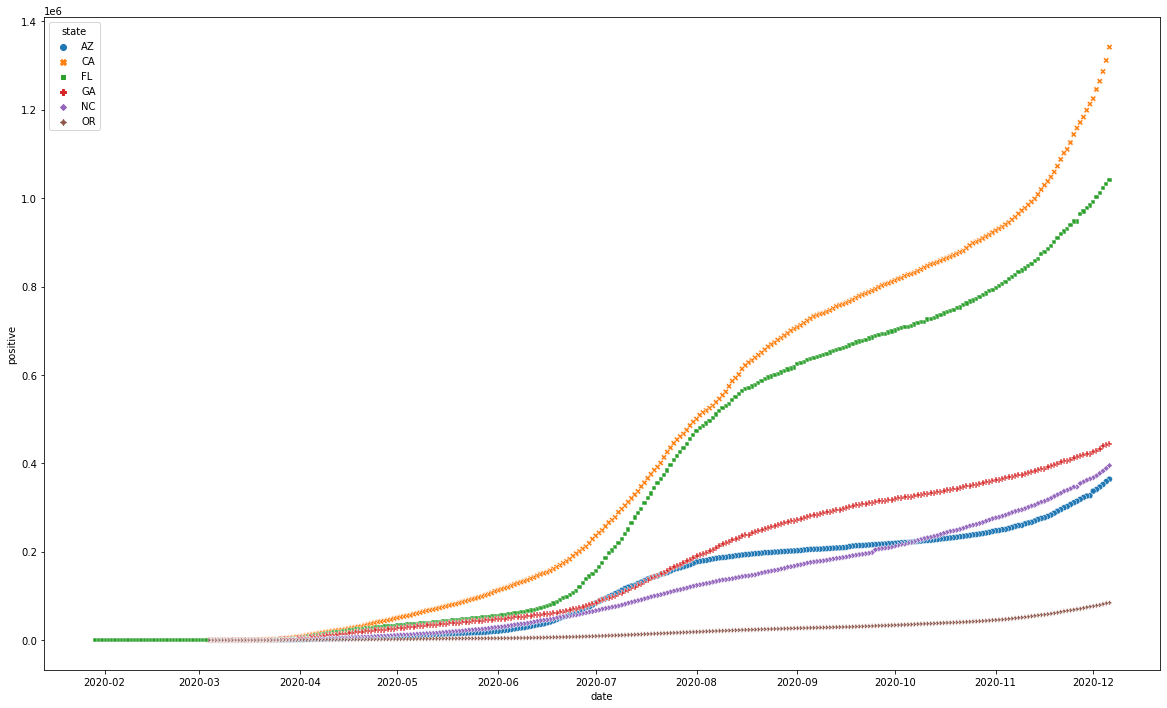

In [361]:
fig_size = (20, 12)
fig, ax = plt.subplots(figsize=fig_size)
sns.scatterplot(data=outer, x="date", y="positive", hue="state", style="state")

<AxesSubplot:xlabel='date', ylabel='positive'>

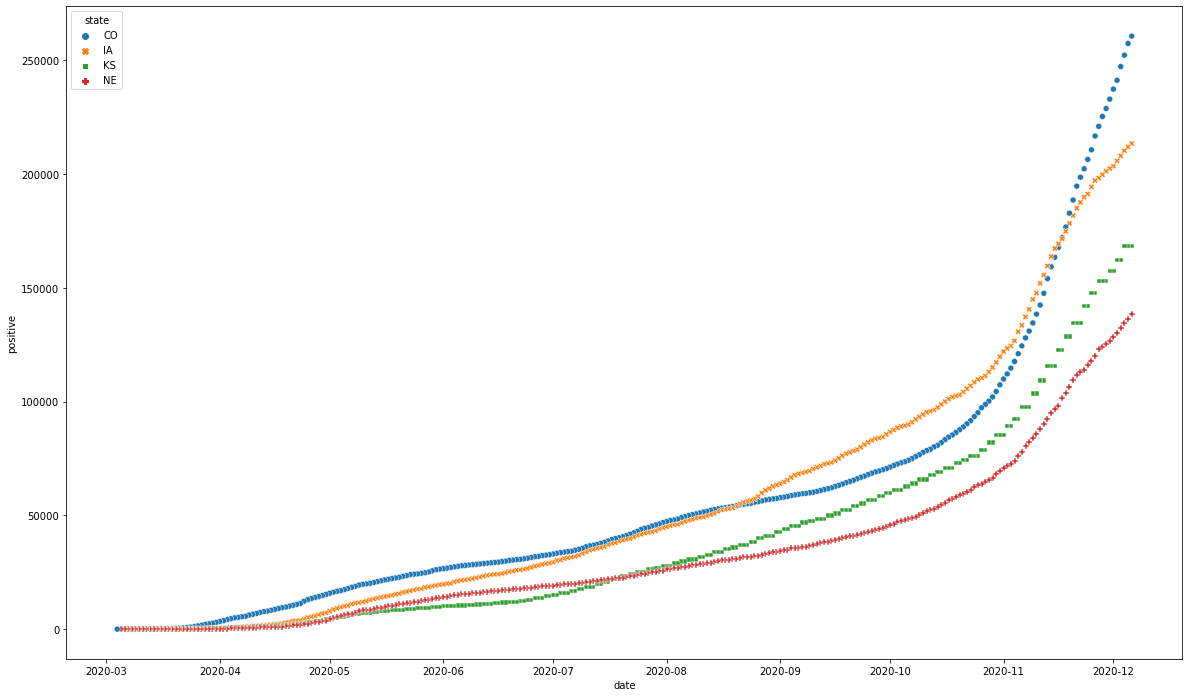

In [362]:
fig_size = (20, 12)
fig, ax = plt.subplots(figsize=fig_size)
sns.scatterplot(data=inner, x="date", y="positive", hue="state", style="state")

It seems that there isn't a direct relation between inner and outer states as their positive test results seem to vary primarily on population and not location. 